In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('dataset_estudiantes.csv')
df.head()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
0,8.957476,48.830601,86.640182,6.675694,25,Fácil,Sí,Tarde,Lectura/Escritura,84.4,1
1,11.042524,80.825707,83.449655,4.616844,18,Difícil,No,Tarde,NaN,72.0,1
2,4.510776,90.383694,74.623607,7.755246,25,Fácil,No,Mañana,Lectura/Escritura,80.0,1
3,6.647213,81.878257,82.849841,8.592826,23,Fácil,No,NaN,Visual,78.2,1
4,1.000000,66.254179,54.539935,6.671840,21,Medio,No,NaN,Auditivo,66.0,1


In [9]:
print("Las dimensiones del dataset son: ")
print("Nº de filas =", df.shape[0])
print("Nº de columnas =", df.shape[1])

Las dimensiones del dataset son: 
Nº de filas = 1000
Nº de columnas = 11


In [11]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Las columnas numéricas son: ", num_cols) 
print("Las columnas categóricas son: ", cat_cols)

Las columnas numéricas son:  ['horas_estudio_semanal', 'nota_anterior', 'tasa_asistencia', 'horas_sueno', 'edad', 'nota_final', 'aprobado']
Las columnas categóricas son:  ['nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido', 'estilo_aprendizaje']


In [12]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
horas_estudio_semanal,1000.0,10.07,4.85,1.0,6.63,10.00,13.37,25.0
nota_anterior,1000.0,69.89,14.69,30.0,59.88,70.00,80.12,100.0
tasa_asistencia,1000.0,73.99,18.20,20.0,61.51,75.00,88.49,100.0
horas_sueno,850.0,7.01,1.44,4.0,6.00,7.02,8.02,10.0
edad,1000.0,23.53,3.48,18.0,21.00,24.00,27.00,29.0
nota_final,1000.0,71.44,9.56,30.0,64.78,71.40,77.90,100.0
aprobado,1000.0,0.90,0.30,0.0,1.00,1.00,1.00,1.0


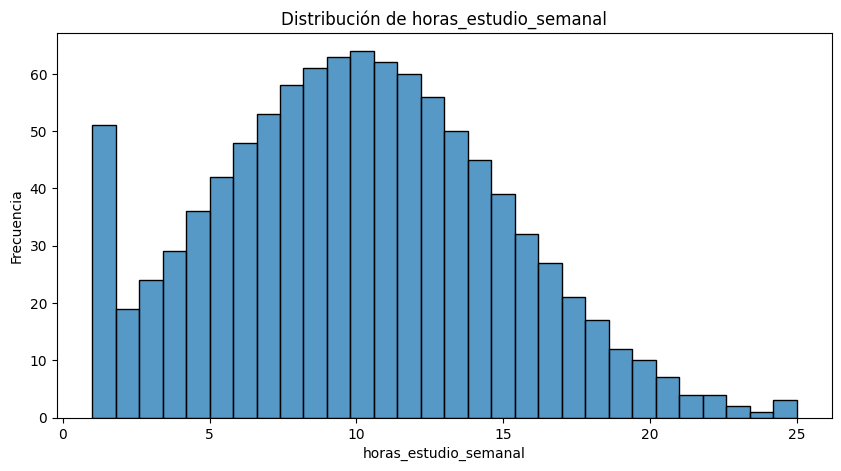

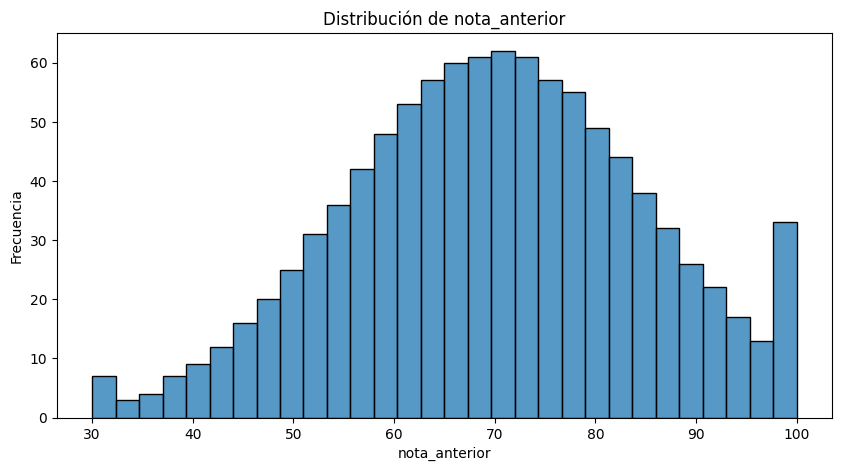

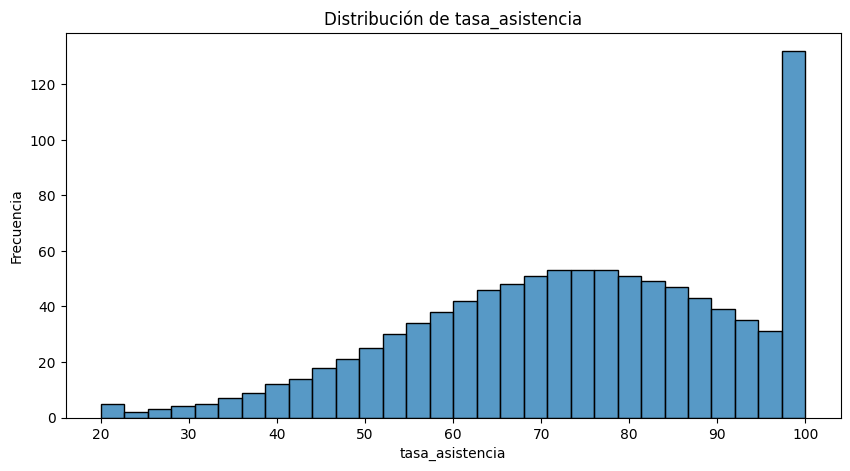

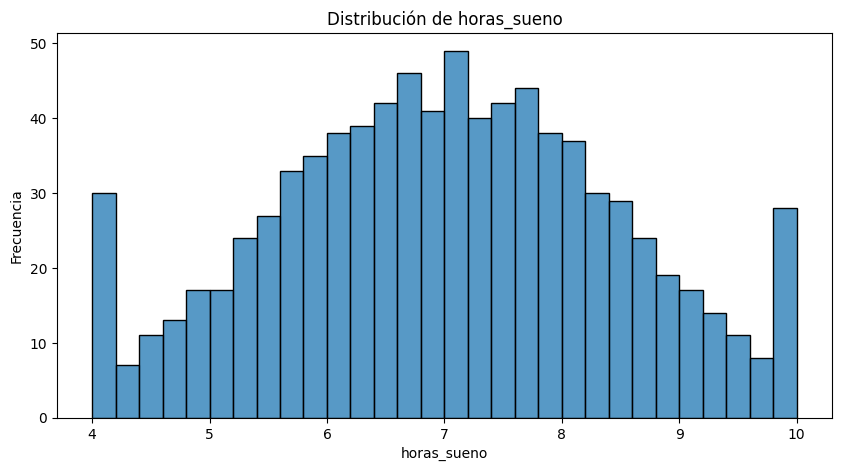

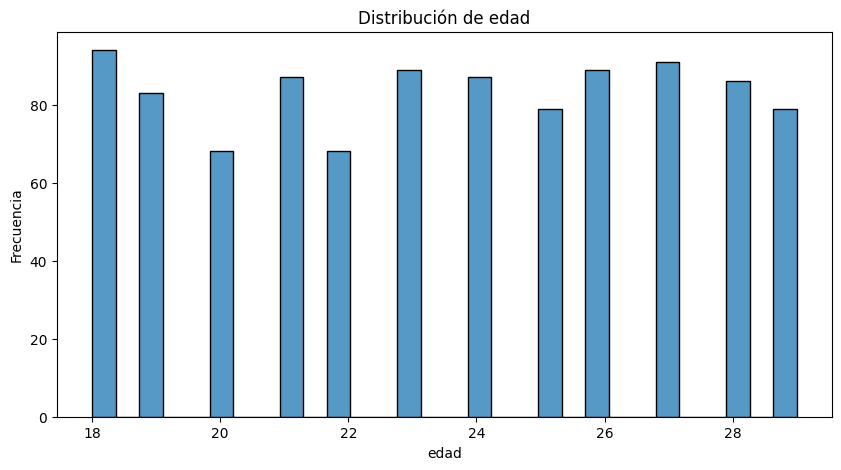

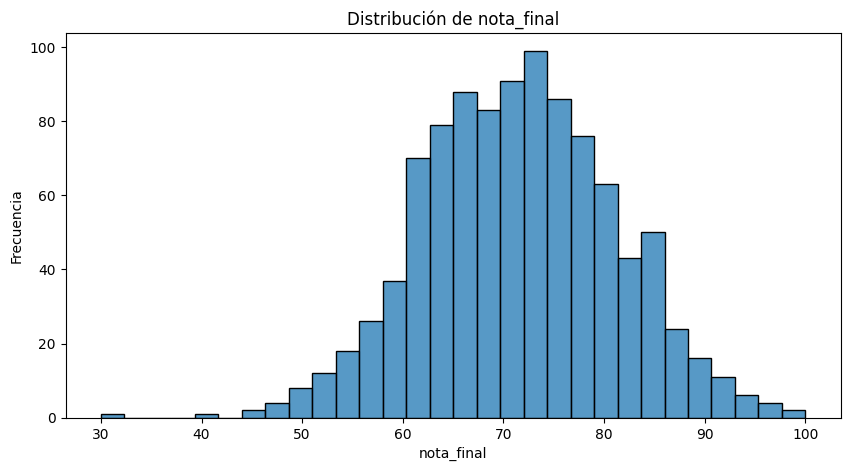

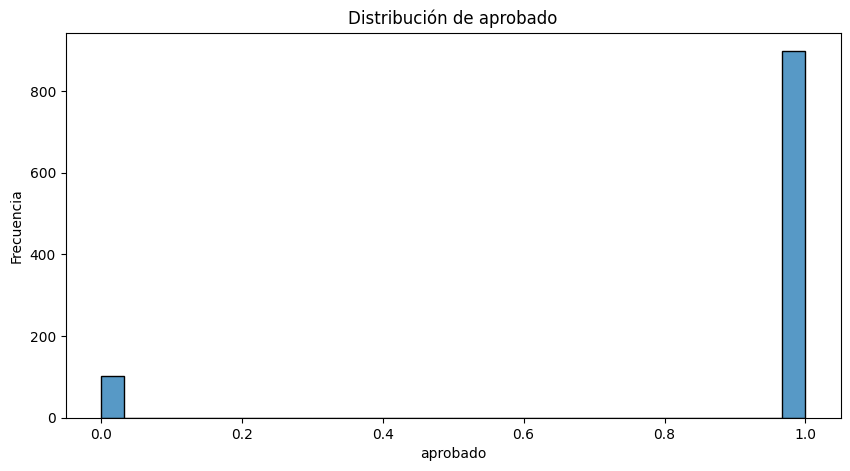

In [13]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=30, edgecolor='black')

    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    plt.show()

In [14]:
for col in cat_cols:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{col}' -----------\n")
    print(f"Valores únicos: {df[col].unique()}\n")
    print("Frecuencias de los valores únicos de las categorías:")
    display(df[col].value_counts())

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'nivel_dificultad' -----------

Valores únicos: ['Fácil' 'Difícil' 'Medio']

Frecuencias de los valores únicos de las categorías:


nivel_dificultad
Medio      504
Fácil      313
Difícil    183
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'tiene_tutor' -----------

Valores únicos: ['Sí' 'No']

Frecuencias de los valores únicos de las categorías:


tiene_tutor
No    597
Sí    403
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'horario_estudio_preferido' -----------

Valores únicos: ['Tarde' 'Mañana' nan 'Noche']

Frecuencias de los valores únicos de las categorías:


horario_estudio_preferido
Noche     344
Tarde     337
Mañana    219
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'estilo_aprendizaje' -----------

Valores únicos: ['Lectura/Escritura' nan 'Visual' 'Auditivo' 'Kinestésico']

Frecuencias de los valores únicos de las categorías:


estilo_aprendizaje
Visual               363
Auditivo             254
Kinestésico          178
Lectura/Escritura    155
Name: count, dtype: int64

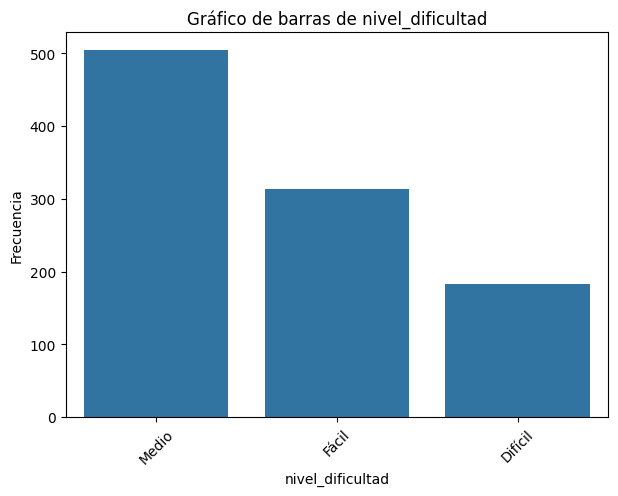

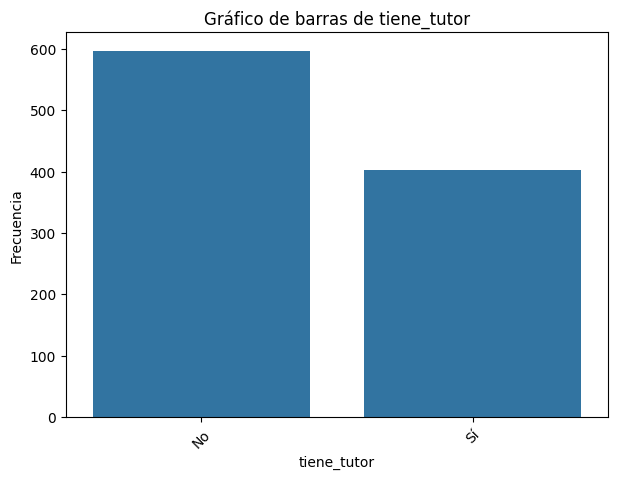

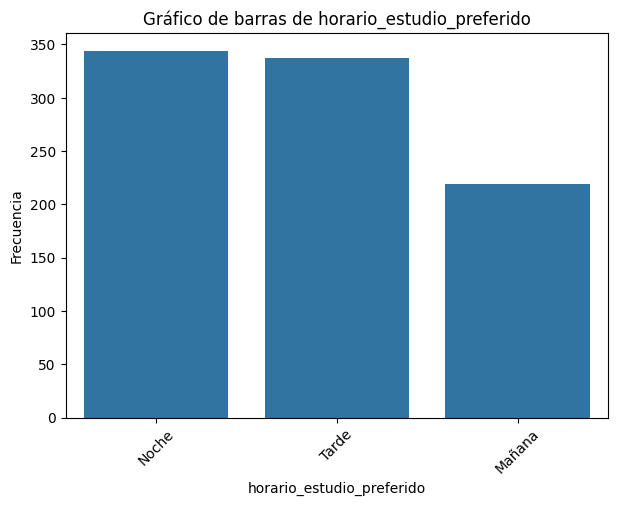

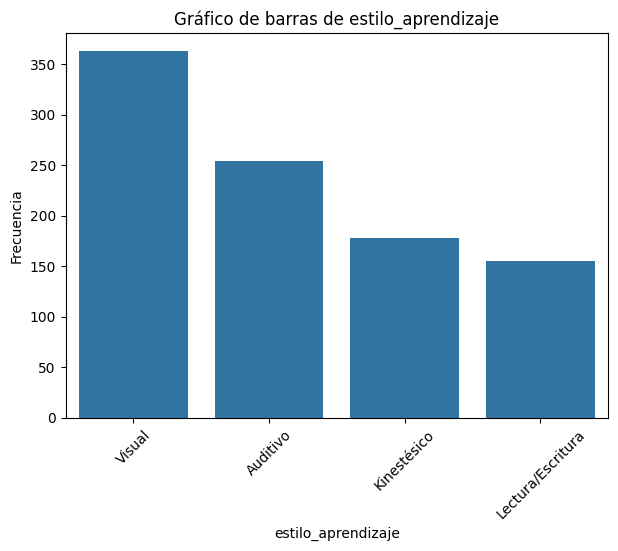

In [15]:
for col in cat_cols:
    num_categories = df[col].nunique()
    width = max(7, min(num_categories * 0.5, 25))
    height = 5  # Altura fija

    plt.figure(figsize=(width, height))
    sns.countplot(x=df[col], order=df[col].value_counts().index)

    plt.title(f'Gráfico de barras de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

    plt.show()